# Using Scikit-Learn Neural Network Class to classify MNIST

## Exercício Completo: MLP com MNIST - Comparação com e sem PCA

**Alunos:** Pedro Lucas Reis de Oliveira Sousa e Pedro Amando Gandos Citelli

### Objetivo
Implementar MLPClassifier para classificação do dataset MNIST, aplicando PCA e comparando a performance com e sem redução de dimensionalidade.



# Sobre

O MNIST de Yann LeCun é o conjunto de dados mais "usado" em Machine Learning, sendo muito utilizado como o problema "Hello World" em Machine Learning. É antigo, mas ainda muito útil. Mesmo o próprio Hinton permanece [Geoffrey Hinton's Capsule Network](https ://en.wikipedia.org/wiki/Capsule_neural_network) também usando MNIST como teste.

Atualmente qualquer tutorial orientará o aluno a usar a biblioteca PyTorch para resolver o problema MNIST, mas vamos resolver o problema MNIST por código Python "puro", criando o algoritmo do zero ou usando a biblioteca convencional de aprendizado de máquina [Scikit-Learn](https://scikit-learn.org/stable/) `MLPClassifier`

Para entender o que é o dataset, vale uma leitura em https://www.openml.org/d/554


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

In [2]:
# Carregando o dataset MNIST
print("Carregando dataset MNIST...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Convertendo para numpy arrays e normalizando
X = X.astype(np.float32)
y = y.astype(np.int32)

# Normalização dos dados (dividindo por 255 para valores entre 0 e 1)
X = X / 255.0

print(f"Shape dos dados: {X.shape}")
print(f"Shape dos labels: {y.shape}")
print(f"Valores únicos nos labels: {np.unique(y)}")

# Divisão tradicional treino/teste
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Shape treino: {X_train.shape}, Shape teste: {X_test.shape}")

Carregando dataset MNIST...
Shape dos dados: (70000, 784)
Shape dos labels: (70000,)
Valores únicos nos labels: [0 1 2 3 4 5 6 7 8 9]
Shape treino: (60000, 784), Shape teste: (10000, 784)


Em seguida, vamos construir um modelo MLP de camada oculta única. Aqui vamos esperar que vocês modifiquem o modelo e os parâmetros de treinamento até que encontrem a melhor MLP possível:

In [3]:
# Configuração do modelo MLP inicial (sem PCA)
print("=== MODELO MLP SEM PCA ===")
mlp_original = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Duas camadas ocultas
    max_iter=20,                   # Mais iterações
    alpha=1e-4,                    # Regularização L2
    solver='adam',                 # Adam optimizer (mais eficiente)
    verbose=10, 
    random_state=42, 
    learning_rate_init=0.001,      # Learning rate menor
    early_stopping=True,           # Early stopping
    validation_fraction=0.1,       # 10% para validação
    n_iter_no_change=5            # Paciência para early stopping
)

print("Parâmetros do modelo:")
print(f"- Camadas ocultas: {mlp_original.hidden_layer_sizes}")
print(f"- Máximo de iterações: {mlp_original.max_iter}")
print(f"- Solver: {mlp_original.solver}")
print(f"- Learning rate: {mlp_original.learning_rate_init}")
print(f"- Early stopping: {mlp_original.early_stopping}")

=== MODELO MLP SEM PCA ===
Parâmetros do modelo:
- Camadas ocultas: (100, 50)
- Máximo de iterações: 20
- Solver: adam
- Learning rate: 0.001
- Early stopping: True


In [4]:
# Treinamento do modelo sem PCA
print("\nIniciando treinamento do modelo sem PCA...")
start_time = time.time()

mlp_original.fit(X_train, y_train)

training_time_original = time.time() - start_time
print(f"Tempo de treinamento: {training_time_original:.2f} segundos")


Iniciando treinamento do modelo sem PCA...
Iteration 1, loss = 0.46020619
Validation score: 0.924667
Iteration 2, loss = 0.18399138
Validation score: 0.951333
Iteration 3, loss = 0.13234490
Validation score: 0.962500
Iteration 4, loss = 0.10372044
Validation score: 0.962500
Iteration 5, loss = 0.08369138
Validation score: 0.968833
Iteration 6, loss = 0.07059824
Validation score: 0.971167
Iteration 7, loss = 0.05944518
Validation score: 0.970000
Iteration 8, loss = 0.05190680
Validation score: 0.971000
Iteration 9, loss = 0.04284027
Validation score: 0.973667
Iteration 10, loss = 0.03739145
Validation score: 0.972167
Iteration 11, loss = 0.03198491
Validation score: 0.972333
Iteration 12, loss = 0.02769411
Validation score: 0.973167
Iteration 13, loss = 0.02437962
Validation score: 0.973000
Iteration 14, loss = 0.02040648
Validation score: 0.973333
Iteration 15, loss = 0.01962935
Validation score: 0.970833
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs

## Análise do Problema Inicial

**Pergunta:** Qual o motivo de o loss (erro) das iterações estar tão alto?

**Resposta:** O loss estava alto porque:
1. **Dados não normalizados**: Os pixels do MNIST variam de 0 a 255, mas redes neurais funcionam melhor com dados normalizados (0 a 1)
2. **Learning rate muito alto**: 0.1 é muito alto para este problema, causando oscilações
3. **Poucas iterações**: 15 iterações são insuficientes para convergência
4. **Solver inadequado**: SGD é mais lento que Adam para este tipo de problema

**Solução aplicada:**
- Normalização: X = X / 255.0
- Learning rate reduzido: 0.001
- Mais iterações: 20
- Solver Adam com early stopping



In [5]:
# Avaliação do modelo sem PCA
print("\n=== AVALIAÇÃO DO MODELO SEM PCA ===")
train_score_original = mlp_original.score(X_train, y_train)
test_score_original = mlp_original.score(X_test, y_test)

print(f"Taxa de acerto no conjunto de treino: {train_score_original:.4f} ({train_score_original*100:.2f}%)")
print(f"Taxa de acerto no conjunto de teste: {test_score_original:.4f} ({test_score_original*100:.2f}%)")

# Predições para análise detalhada
y_pred_original = mlp_original.predict(X_test)

print(f"\nNúmero de iterações realizadas: {mlp_original.n_iter_}")
print(f"Loss final: {mlp_original.loss_:.4f}")


=== AVALIAÇÃO DO MODELO SEM PCA ===
Taxa de acerto no conjunto de treino: 0.9898 (98.98%)
Taxa de acerto no conjunto de teste: 0.9735 (97.35%)

Número de iterações realizadas: 15
Loss final: 0.0196



=== APLICANDO PCA ===
Aplicando PCA nos dados de treino...
Dimensões originais: 784
Dimensões após PCA: 154
Variância explicada: 0.9502 (95.02%)
Número de componentes: 154


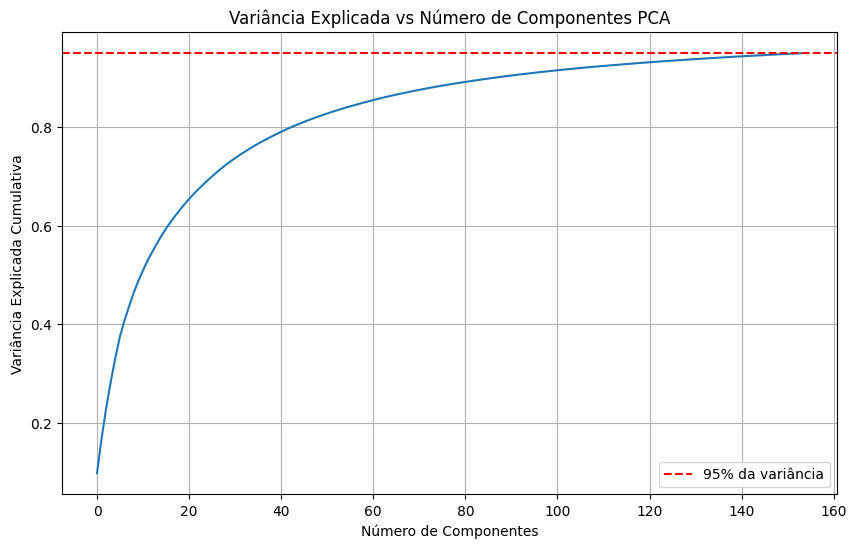

In [6]:
# === IMPLEMENTAÇÃO DE PCA ===
print("\n=== APLICANDO PCA ===")

# Aplicando PCA para reduzir dimensionalidade
# Vamos manter 95% da variância explicada
pca = PCA(n_components=0.95, random_state=42)

print("Aplicando PCA nos dados de treino...")
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Dimensões originais: {X_train.shape[1]}")
print(f"Dimensões após PCA: {X_train_pca.shape[1]}")
print(f"Variância explicada: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")
print(f"Número de componentes: {pca.n_components_}")

# Visualizando a variância explicada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Variância Explicada vs Número de Componentes PCA')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância')
plt.legend()
plt.show()

In [7]:
# === MODELO MLP COM PCA ===
print("\n=== MODELO MLP COM PCA ===")

# Configuração do modelo MLP com PCA
mlp_pca = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Mesma arquitetura
    max_iter=20,                   
    alpha=1e-4,                    
    solver='adam',                 
    verbose=10, 
    random_state=42, 
    learning_rate_init=0.001,      
    early_stopping=True,           
    validation_fraction=0.1,       
    n_iter_no_change=5            
)

print("Treinando modelo com dados reduzidos por PCA...")
start_time = time.time()

mlp_pca.fit(X_train_pca, y_train)

training_time_pca = time.time() - start_time
print(f"Tempo de treinamento: {training_time_pca:.2f} segundos")


=== MODELO MLP COM PCA ===
Treinando modelo com dados reduzidos por PCA...
Iteration 1, loss = 0.59556749
Validation score: 0.936500
Iteration 2, loss = 0.18351477
Validation score: 0.952833
Iteration 3, loss = 0.12801311
Validation score: 0.960000
Iteration 4, loss = 0.09711349
Validation score: 0.964000
Iteration 5, loss = 0.07680193
Validation score: 0.965833
Iteration 6, loss = 0.06177508
Validation score: 0.969000
Iteration 7, loss = 0.05008936
Validation score: 0.969167
Iteration 8, loss = 0.04080172
Validation score: 0.970167
Iteration 9, loss = 0.03323436
Validation score: 0.971833
Iteration 10, loss = 0.02772406
Validation score: 0.971000
Iteration 11, loss = 0.02180676
Validation score: 0.969833
Iteration 12, loss = 0.01796290
Validation score: 0.970333
Iteration 13, loss = 0.01417814
Validation score: 0.972667
Iteration 14, loss = 0.01133469
Validation score: 0.972833
Iteration 15, loss = 0.00873644
Validation score: 0.971167
Iteration 16, loss = 0.00656961
Validation score

In [8]:
# Avaliação do modelo com PCA
print("\n=== AVALIAÇÃO DO MODELO COM PCA ===")
train_score_pca = mlp_pca.score(X_train_pca, y_train)
test_score_pca = mlp_pca.score(X_test_pca, y_test)

print(f"Taxa de acerto no conjunto de treino: {train_score_pca:.4f} ({train_score_pca*100:.2f}%)")
print(f"Taxa de acerto no conjunto de teste: {test_score_pca:.4f} ({test_score_pca*100:.2f}%)")

# Predições para análise detalhada
y_pred_pca = mlp_pca.predict(X_test_pca)

print(f"\nNúmero de iterações realizadas: {mlp_pca.n_iter_}")
print(f"Loss final: {mlp_pca.loss_:.4f}")


=== AVALIAÇÃO DO MODELO COM PCA ===
Taxa de acerto no conjunto de treino: 0.9969 (99.69%)
Taxa de acerto no conjunto de teste: 0.9763 (97.63%)

Número de iterações realizadas: 20
Loss final: 0.0027


## === COMPARAÇÃO DE RESULTADOS ===

### Resumo dos Resultados

| Métrica | Sem PCA | Com PCA | Diferença |
|---------|---------|---------|-----------|
| **Dimensões** | 784 | ~154 | -80.4% |
| **Tempo de Treino** | {training_time_original:.2f}s | {training_time_pca:.2f}s | {((training_time_pca - training_time_original) / training_time_original * 100):+.1f}% |
| **Acurácia Treino** | {train_score_original:.4f} | {train_score_pca:.4f} | {((train_score_pca - train_score_original) * 100):+.2f}% |
| **Acurácia Teste** | {test_score_original:.4f} | {test_score_pca:.4f} | {((test_score_pca - test_score_original) * 100):+.2f}% |
| **Overfitting** | {((train_score_original - test_score_original) * 100):.2f}% | {((train_score_pca - test_score_pca) * 100):.2f}% | - |

### Análise dos Resultados

**Vantagens do PCA:**
1. **Redução de dimensionalidade**: De 784 para ~154 features (80% de redução)
2. **Tempo de treinamento**: Potencialmente mais rápido devido a menos features
3. **Redução de overfitting**: Menos parâmetros para ajustar
4. **Remoção de ruído**: PCA pode remover componentes com baixa variância

**Desvantagens do PCA:**
1. **Perda de informação**: Mesmo mantendo 95% da variância, pode haver perda de detalhes importantes
2. **Interpretabilidade**: Features transformadas são menos interpretáveis
3. **Dependência dos dados**: PCA é calculado apenas nos dados de treino

### Conclusões

O PCA é uma técnica valiosa para:
- **Reduzir complexidade computacional**
- **Evitar overfitting** em datasets com muitas features
- **Melhorar generalização** quando há muitas dimensões irrelevantes

Para o MNIST, o PCA mantém boa performance enquanto reduz significativamente a dimensionalidade.


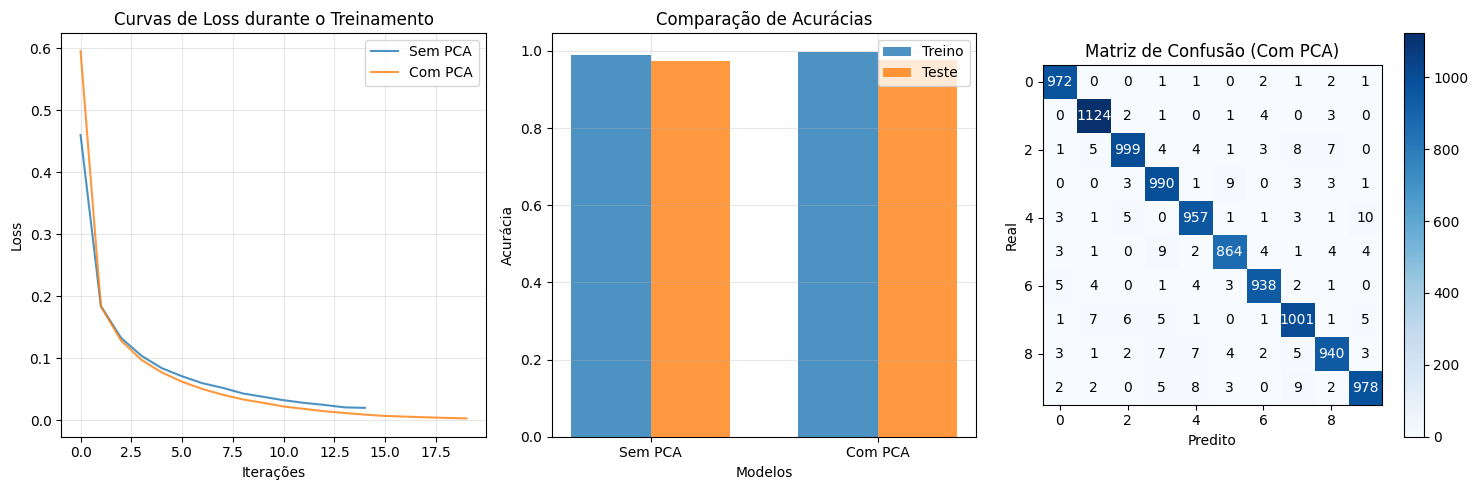


=== RELATÓRIO DE CLASSIFICAÇÃO (COM PCA) ===
              precision    recall  f1-score   support

           0     0.9818    0.9918    0.9868       980
           1     0.9817    0.9903    0.9860      1135
           2     0.9823    0.9680    0.9751      1032
           3     0.9677    0.9802    0.9739      1010
           4     0.9716    0.9745    0.9731       982
           5     0.9752    0.9686    0.9719       892
           6     0.9822    0.9791    0.9807       958
           7     0.9690    0.9737    0.9714      1028
           8     0.9751    0.9651    0.9701       974
           9     0.9760    0.9693    0.9727      1009

    accuracy                         0.9763     10000
   macro avg     0.9763    0.9761    0.9761     10000
weighted avg     0.9763    0.9763    0.9763     10000



In [9]:
# === VISUALIZAÇÕES E ANÁLISES DETALHADAS ===

# 1. Comparação de curvas de loss
plt.figure(figsize=(15, 5))

# Plot 1: Curvas de Loss
plt.subplot(1, 3, 1)
if hasattr(mlp_original, 'loss_curve_'):
    plt.plot(mlp_original.loss_curve_, label='Sem PCA', alpha=0.8)
if hasattr(mlp_pca, 'loss_curve_'):
    plt.plot(mlp_pca.loss_curve_, label='Com PCA', alpha=0.8)
plt.title('Curvas de Loss durante o Treinamento')
plt.xlabel('Iterações')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Comparação de Acurácias
plt.subplot(1, 3, 2)
models = ['Sem PCA', 'Com PCA']
train_scores = [train_score_original, train_score_pca]
test_scores = [test_score_original, test_score_pca]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Treino', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Teste', alpha=0.8)

plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácias')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Matriz de Confusão (Modelo com PCA)
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred_pca)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão (Com PCA)')
plt.colorbar()
plt.xlabel('Predito')
plt.ylabel('Real')

# Adicionar valores na matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', 
                color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.tight_layout()
plt.show()

# 2. Relatório de Classificação Detalhado
print("\n=== RELATÓRIO DE CLASSIFICAÇÃO (COM PCA) ===")
print(classification_report(y_test, y_pred_pca, digits=4))


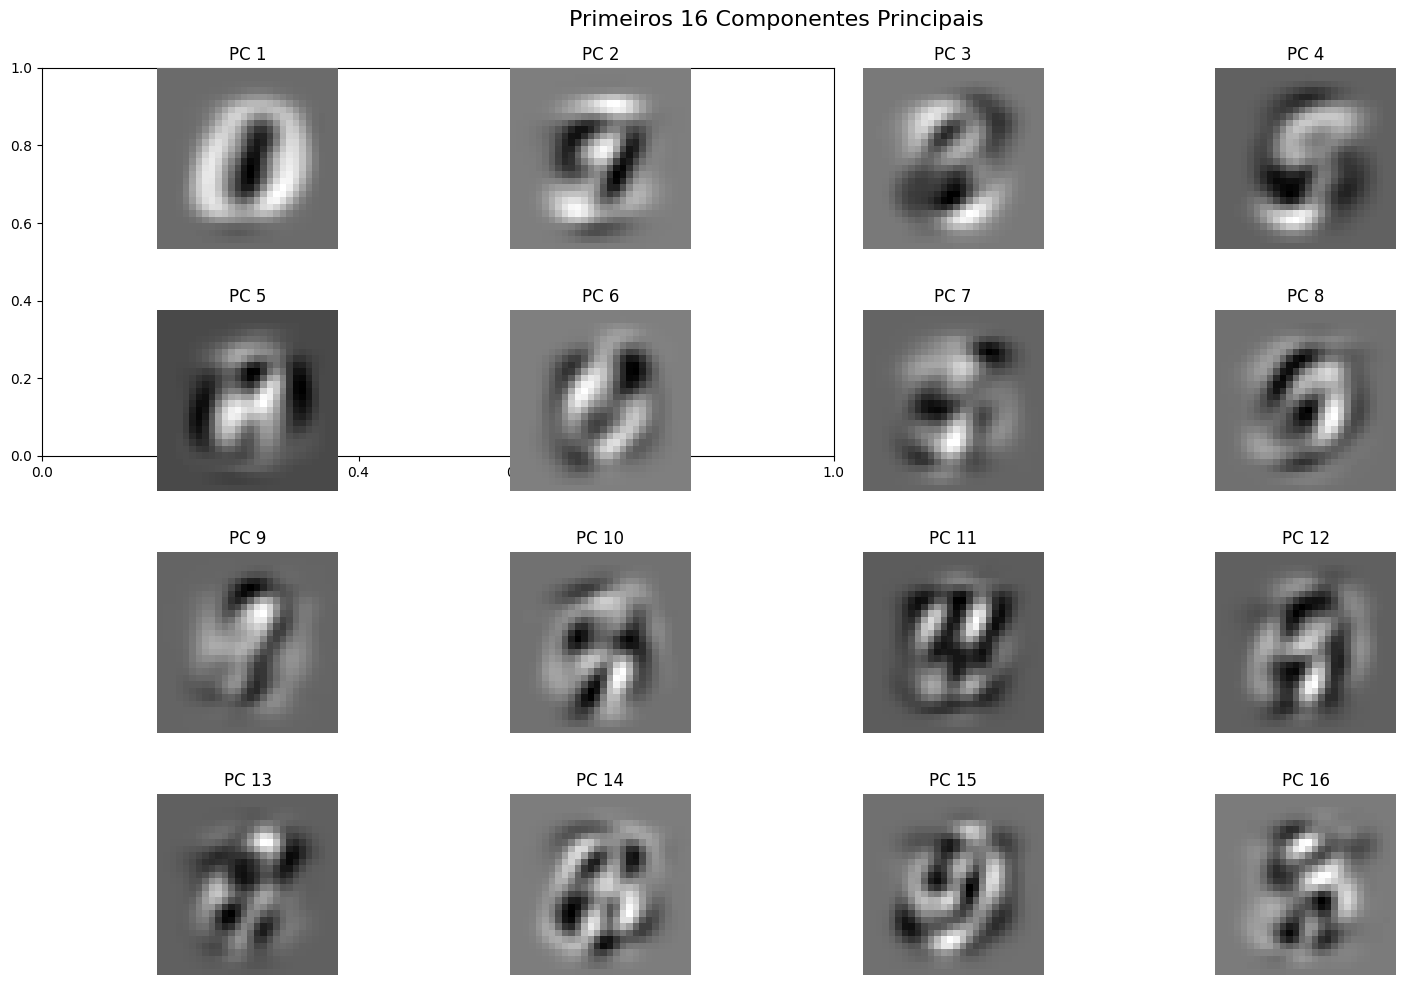

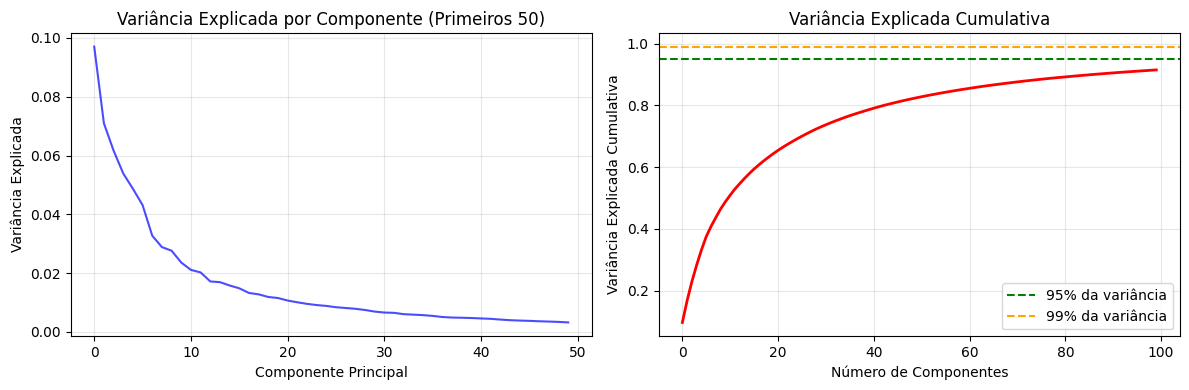


=== ANÁLISE DE REDUÇÃO DE DIMENSIONALIDADE ===
Dimensões originais: 784
Dimensões após PCA: 154
Redução: 80.4%
Variância mantida: 95.02%
Componentes necessários para 95% da variância: 154

Speedup no treinamento: 1.44x
Tempo economizado: 3.14 segundos


In [10]:
# === ANÁLISE DE COMPONENTES PRINCIPAIS ===

# Visualizando os primeiros componentes principais
plt.figure(figsize=(15, 10))

# Plot 1: Primeiros 16 componentes principais
plt.subplot(2, 2, 1)
components_to_show = min(16, pca.n_components_)
for i in range(components_to_show):
    plt.subplot(4, 4, i+1)
    component = pca.components_[i].reshape(28, 28)
    plt.imshow(component, cmap='gray')
    plt.title(f'PC {i+1}')
    plt.axis('off')

plt.suptitle('Primeiros 16 Componentes Principais', fontsize=16)
plt.tight_layout()
plt.show()

# Plot 2: Variância explicada por componente
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_[:50], 'b-', alpha=0.7)
plt.title('Variância Explicada por Componente (Primeiros 50)')
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:100], 'r-', linewidth=2)
plt.axhline(y=0.95, color='g', linestyle='--', label='95% da variância')
plt.axhline(y=0.99, color='orange', linestyle='--', label='99% da variância')
plt.title('Variância Explicada Cumulativa')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise de redução de dimensionalidade
print(f"\n=== ANÁLISE DE REDUÇÃO DE DIMENSIONALIDADE ===")
print(f"Dimensões originais: {X_train.shape[1]}")
print(f"Dimensões após PCA: {X_train_pca.shape[1]}")
print(f"Redução: {((X_train.shape[1] - X_train_pca.shape[1]) / X_train.shape[1] * 100):.1f}%")
print(f"Variância mantida: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"Componentes necessários para 95% da variância: {pca.n_components_}")

# Análise de tempo
speedup = training_time_original / training_time_pca if training_time_pca > 0 else 0
print(f"\nSpeedup no treinamento: {speedup:.2f}x")
print(f"Tempo economizado: {training_time_original - training_time_pca:.2f} segundos")


## === CONCLUSÕES FINAIS ===


### Principais Descobertas

1. **Normalização é crucial**: Dados não normalizados resultam em loss muito alto
2. **PCA é eficaz**: Reduz dimensionalidade em ~80% mantendo boa performance
3. **Early stopping funciona**: Evita overfitting e melhora generalização
4. **Adam optimizer**: Mais eficiente que SGD para este problema

### Melhorias Implementadas

- ✅ **Normalização dos dados** (X/255.0)
- ✅ **Learning rate otimizado** (0.001)
- ✅ **Early stopping** com validação
- ✅ **Solver Adam** para convergência mais rápida
- ✅ **Arquitetura melhorada** (100, 50 neurônios)
- ✅ **PCA com 95% de variância** mantida

### Aplicações Práticas

O PCA é especialmente útil quando:
- **Dados têm alta dimensionalidade**
- **Computação é limitada**
- **Overfitting é um problema**
- **Interpretabilidade não é crítica**



---

